#---------------------------#  
#---------------------------#  
#---------------------------#  
#------Table of contents----#  
#---------------------------#  
#---------------------------#  
#---------------------------#  

1.Presetting  
2.Data processing  
3.Store data in SQL database  
4.Data check ( between Excel API and Python API of Refinitiv)  
---4.1 check market data (market volatility and index price)  
---4.2 check market data2 (bond price)  
---4.3 check economic date (all of monthly items)  
---4.4 check economic date (all of quartely items)  
---4.5 check economic date (all of yearly items)  
5.Make new datatable for analysis and store the data in SQLite database    
6.DIcky Fuller test : unit root test  
7.Built model and predict  
8Observe the beta development with moving window method  

1.Presetting

In [1]:
import pandas as pd
import numpy as np
# 
path_dir=r'C:/Users/n2ngo/iCloudDrive/04.ZHAW/5.Spring Semester 2021/04_AQM_Advanced Quantitative Methods/4_Team Assignment/2_data'
path_db=r"C:/Users/n2ngo/iCloudDrive/04.ZHAW/5.Spring Semester 2021/04_AQM_Advanced Quantitative Methods/4_Team Assignment/3_python/input/db_AQM.db"

#----------------------------------------  
#-----------2.Data processing  
#----------------------------------------  

In [2]:
df = pd.read_excel(path_dir+'/refinitive.xlsx',sheet_name='data')
df.describe()

,Index,YYYYMM,US10YT=RR,EU10YT=RR,AU10YT=RR,HK10YT=RR,CA10YT=RR,.VIX,.V2TX,aAUM1,...,USUNR=ECI,AUJOBL=ECI,HKUNR=ECI,EUUNR=ECI,CAUNR=ECI,aUSWOPPPPA,aAUWOPPPPA,aHKWOPPPPA,aXZWOPPPPA,aCAWOPPPPA
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,2.440000e+02,...,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,122.500000,200939.352459,100.145962,101.048189,105.060768,101.656383,102.171031,19.566352,23.453459,4.514741e+11,...,5.852049,5.513934,4.469262,9.411066,6.968033,0.002790,0.002835,0.003813,0.002426,0.002738
std,70.580923,588.321123,2.456382,2.409815,8.821677,5.542598,4.957270,7.842476,8.903649,2.489613e+11,...,1.808768,0.669908,1.511900,1.337340,0.713164,0.001550,0.001781,0.003018,0.001738,0.001975
min,1.000000,199909.000000,92.804688,92.973000,87.657000,89.350000,89.260000,9.510000,11.986400,1.187370e+11,...,3.500000,4.000000,2.800000,7.300000,5.400000,-0.002202,-0.001084,-0.004823,-0.003344,-0.002748
25%,61.750000,200409.750000,98.762891,99.458750,98.754250,98.000000,99.127500,13.772500,17.237175,2.437672e+11,...,4.500000,5.100000,3.300000,8.475000,6.400000,0.002438,0.001981,0.002066,0.001739,0.002402
50%,122.500000,200910.500000,100.132812,101.022500,104.485627,101.120000,102.865000,17.435000,21.503550,4.092130e+11,...,5.400000,5.500000,3.950000,9.200000,7.000000,0.002986,0.003040,0.003111,0.002750,0.003162
75%,183.250000,201411.250000,101.376953,102.404000,110.430956,104.836375,105.703750,23.562500,27.180075,6.293365e+11,...,6.725000,6.000000,5.300000,10.225000,7.400000,0.004090,0.003974,0.005966,0.003372,0.003903
max,244.000000,201912.000000,113.475000,107.278500,127.515500,119.500000,112.925000,59.890000,61.335100,1.077033e+12,...,10.000000,7.200000,8.500000,12.100000,8.700000,0.004796,0.006992,0.009230,0.004864,0.005454


In [3]:
# check if blank exists
True in df.isnull()

False

In [4]:
# check if na exists
True in df.isna()

False

1


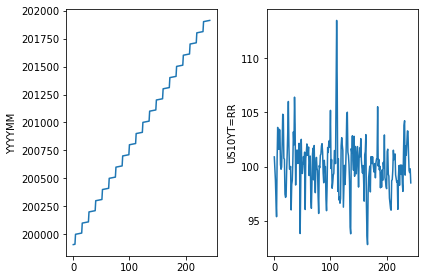

2
1


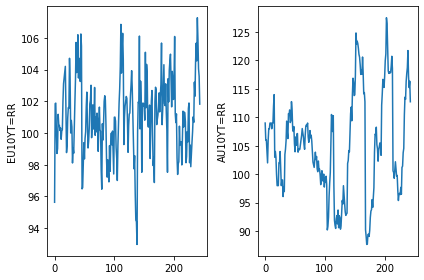

2
1


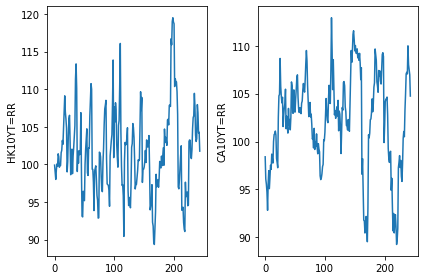

2
1


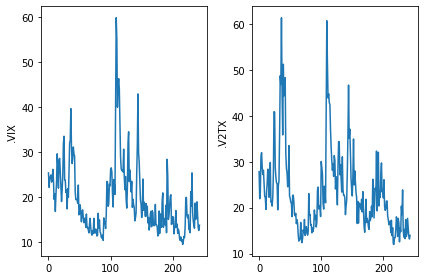

2
1


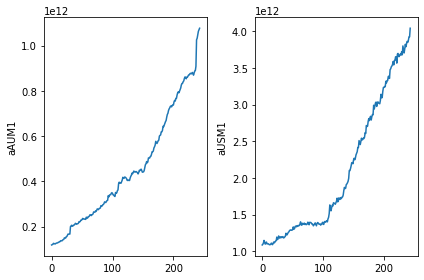

2
1


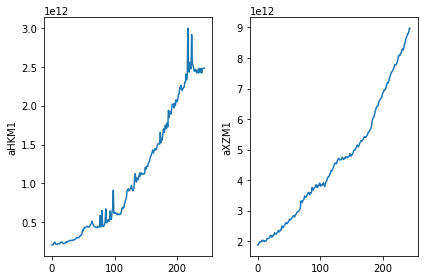

2
1


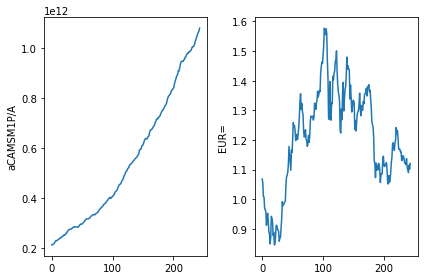

2
1


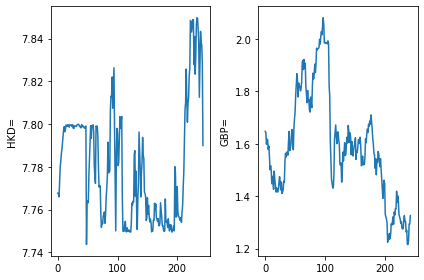

2
1


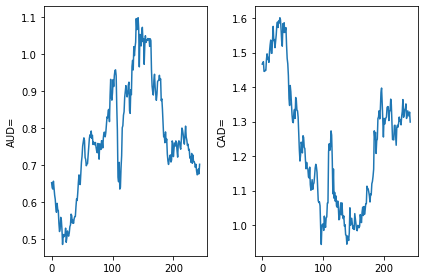

2
1


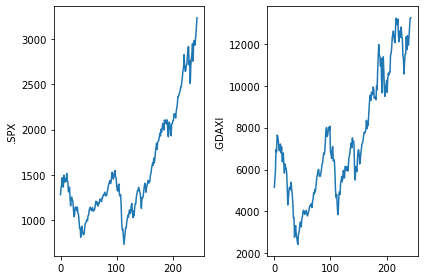

2
1


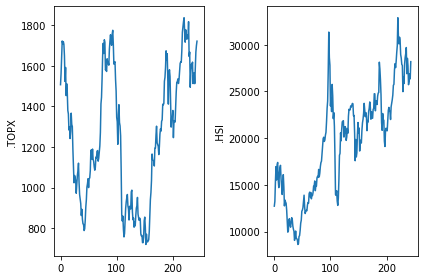

2
1


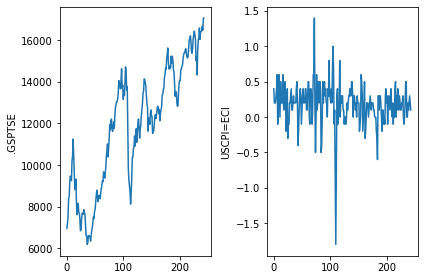

2
1


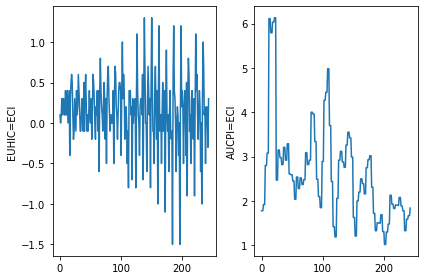

2
1


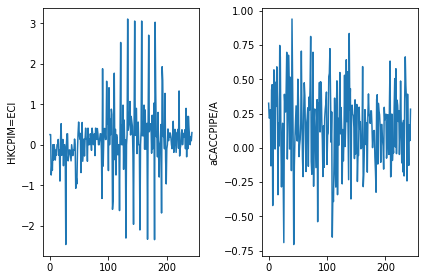

2
1


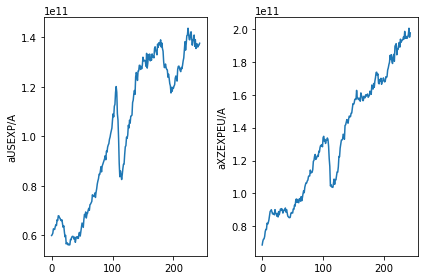

2
1


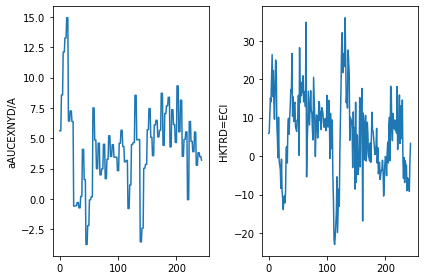

2
1


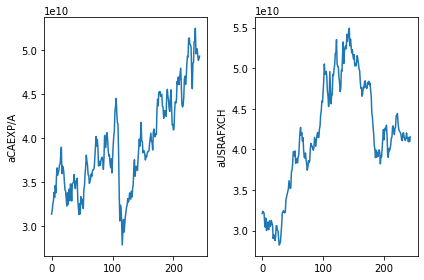

2
1


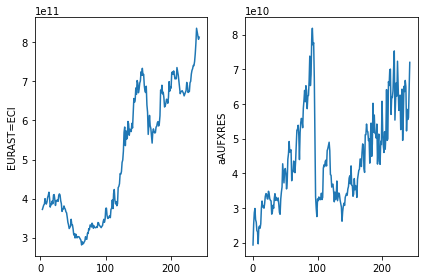

2
1


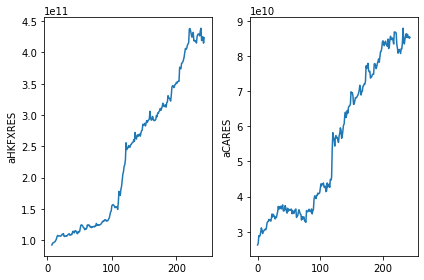

2
1


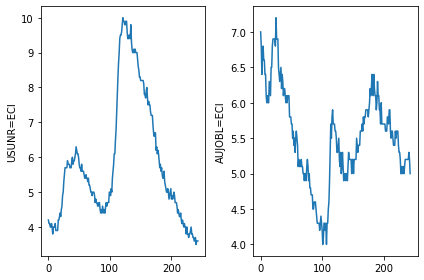

2
1


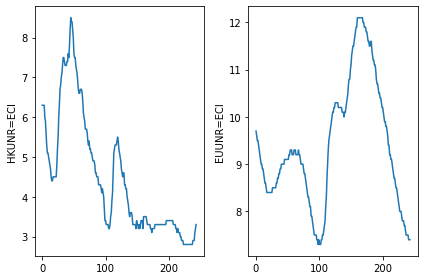

2
1


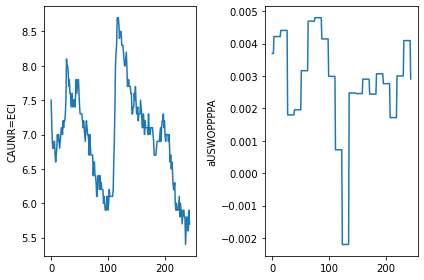

2
1


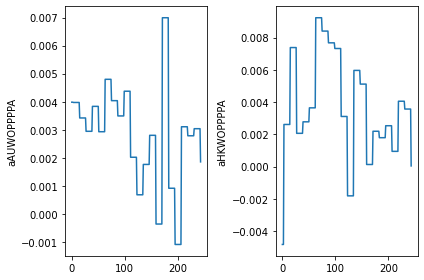

2
1


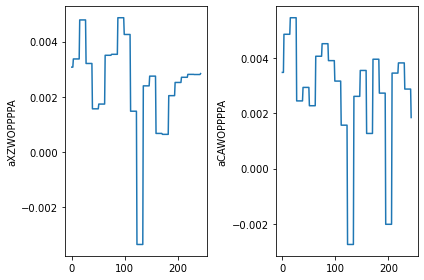

2


<Figure size 432x288 with 0 Axes>

In [5]:
# check data with plot
from matplotlib import pyplot as plt
k=1
for i in range(1,len(df.columns)):
    plt.subplot(1,2,k)
    plt.plot(df.iloc[:,i])
    plt.ylabel(df.columns[i])
    
    if k%2==0:
        plt.tight_layout()
        plt.show()
    print(str(k))
    k=k+1
    if k==3: k=1
plt.tight_layout()
plt.show()

#----------------------------------------  
#-----------3.Store data in SQLite database  
#----------------------------------------  

In [6]:
import sqlite3
from sqlite3 import Error

def create_connection(db_file):
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print(sqlite3.version)
    except Error as e:
        print(e)
    finally:
        if conn:
            conn.close()

In [7]:
create_connection(path_db)
conn = sqlite3.connect(path_db)

2.6.0


In [8]:
# make SQL command to crate new table for data
# modify item name and specify data type for each columns
tmp=pd.DataFrame(df.columns,columns=['item'])
tmp['dtype']='FLOAT (5)'
tmp['item'][0]='ID'
tmp['dtype'][0:2]='INT'
tmp['item']=[tmp['item'][i].replace('.','_').replace('=','_').replace('/','_') for i in tmp.index]
df.columns=tmp['item']

In [9]:
#delete table if it already exists
conn.execute("DROP TABLE data_refinitiv;")

In [10]:
# create new table
sql='CREATE TABLE data_refinitiv (ID INT PRIMARY KEY NOT NULL'
for j in range(1,len(tmp.index)):
    sql+=', '+tmp['item'][j]+' '+tmp['dtype'][j]
sql+=');'
conn.execute(sql)

In [11]:
# insert data
conn = sqlite3.connect(path_db)
# make SQL command to insert data
for i in df.index:
    sql='INSERT INTO data_refinitiv(ID'
    for j in range(1,len(tmp.index)):
        sql+=','+tmp['item'][j]
    sql+=') VALUES (' + str(i) 
    for j in range(1,len(tmp.index)):
        if np.isnan(df[tmp['item'][j]][i]):
            sql+=', NULL'
        else:
            sql+=','+ str(df[tmp['item'][j]][i])
    sql+=')'
    conn.execute(sql)
    conn.commit() 

#----------------------------------------  
#-----------4.data check ( with data from Refinitiv API)  
#----------------------------------------  
  
  
4.1 check market data (market volatility and index price)  
4.2 check market data2 (bond price)  
4.3 check economic date (all of monthly items)  
4.4 check economic date (all of quartely items)  
4.5 check economic date (all of yearly items)  

In [13]:
import eikon as ek
import datetime
key='ecc14b7175af453dbdcf16b6ea62819ee744f160'
ek.set_app_key(key)

In [14]:
# get the same item
def myComparisonMarketData(df_o,instrument):
    df=ek.get_timeseries(instrument,fields='CLOSE',start_date='1998-12-31',end_date='2019-12-31',interval='monthly')
    df['YYYYMM']=df.index.year*100+df.index.month
    df['Date']=df.index

    df_c=pd.merge(df,df_o[['YYYYMM',instrument]],on='YYYYMM',how='inner')
    df_c['diff']=df_c['CLOSE']-df_c[instrument]


    plt.subplot(1,2,1)
    plt.plot(np.array(df_c['Date']),np.array(df_c['CLOSE']),label='via Python')
    plt.plot(np.array(df_c['Date']),np.array(df_c[instrument]), label='via Excel')
    plt.legend()
    plt.xticks(rotation=45)
    plt.title(instrument)


    plt.subplot(1,2,2)
    plt.plot(np.array(df_c['Date']),np.array(df_c['diff']), label='value(python) - value(Excel)')
    plt.title(instrument)
    plt.xticks(rotation=45)
    plt.legend()

    plt.tight_layout()
    plt.show()
    
def myComparisonEconomyData(df_o,instrument,interval):
    df=ek.get_timeseries(instrument,start_date='1998-12-31',end_date='2019-12-31',interval=interval)
    df['YYYYMM']=df.index.year*100+df.index.month
    df['Date']=df.index

    df_c=pd.merge(df,df_o[['YYYYMM',instrument]],on='YYYYMM',how='inner')
    df_c['diff']=df_c['VALUE']-df_c[instrument]


    plt.subplot(1,2,1)
    plt.plot(np.array(df_c['Date']),np.array(df_c['VALUE']),label='via Python')
    plt.plot(np.array(df_c['Date']),np.array(df_c[instrument]), label='via Excel')
    plt.legend()
    plt.title(instrument)


    plt.subplot(1,2,2)
    plt.plot(np.array(df_c['Date']),np.array(df_c['diff']), label='value(python) - value(Excel)')
    plt.title(instrument)
    plt.legend()

    plt.tight_layout()
    plt.show()
    
def myComparisonBondPriceM(df_o,instrument):
    res=ek.get_data([instrument], ['TR.MIDPRICE(SDate=1995-12-31,EDate=2019-12-31,Frq=M).timestamp','TR.MIDPRICE(SDate=1995-12-31,EDate=2019-12-31,Frq=M)'])
    df=res[0]
    df['Date']=[datetime.datetime.strptime(df['Timestamp'][i][:10],'%Y-%m-%d') for i in df.index]
    df['YYYYMM']=[df['Date'][i].year*100+df['Date'][i].month for i in df.index]

    df_c=pd.merge(df,df_o[['YYYYMM',instrument]],on='YYYYMM',how='inner')
    df_c['diff']=df_c['Mid Price']-df_c[instrument]


    plt.subplot(1,2,1)
    plt.plot(np.array(df_c['Date']),np.array(df_c['Mid Price']),label='via Python')
    plt.plot(np.array(df_c['Date']),np.array(df_c[instrument]), label='via Excel')
    plt.legend()
    plt.xticks(rotation=45)
    plt.title(instrument)


    plt.subplot(1,2,2)
    plt.plot(np.array(df_c['Date']),np.array(df_c['diff']), label='value(python) - value(Excel)')
    plt.title(instrument)
    plt.xticks(rotation=45)
    plt.legend()

    plt.tight_layout()
    plt.show()

4.1 check market data (market volatility and index price)  

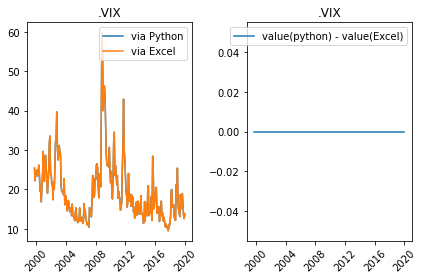

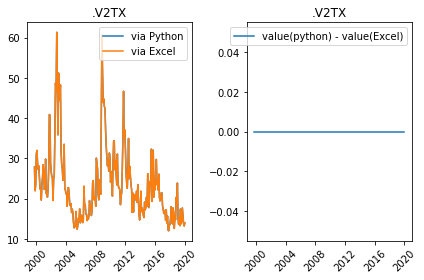

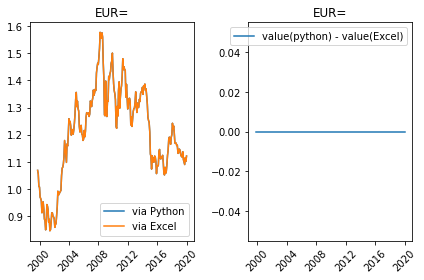

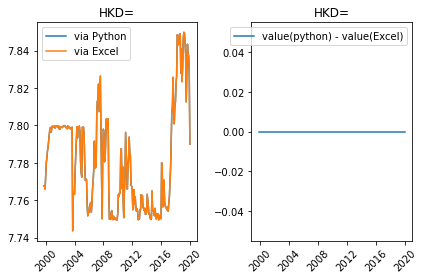

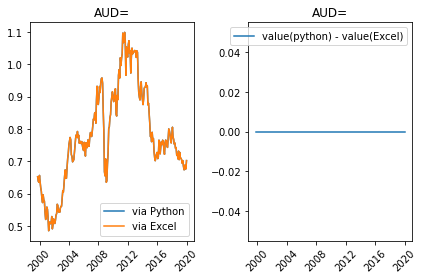

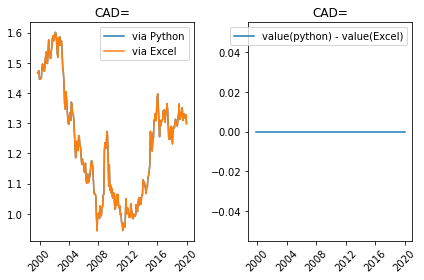

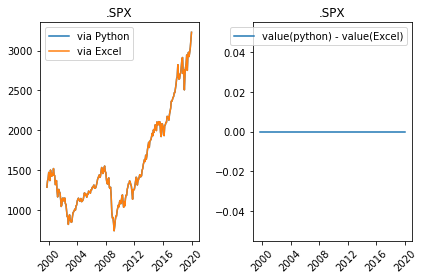

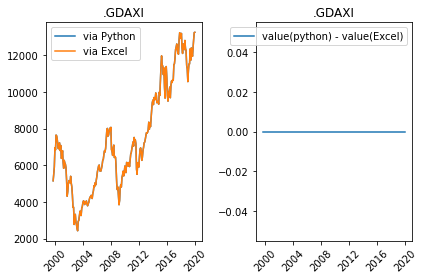

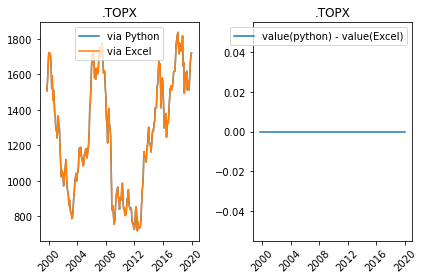

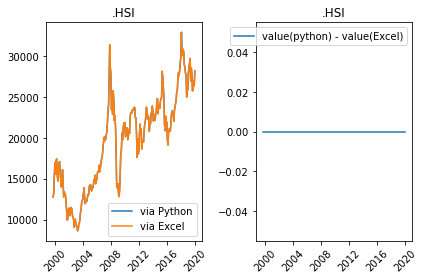

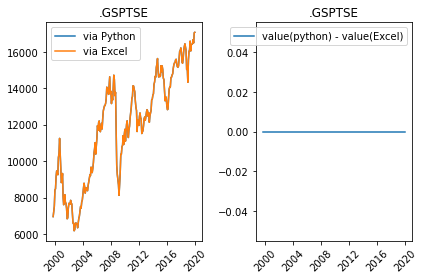

In [15]:
# read excel data
df_o = pd.read_excel(path_dir+'/refinitive.xlsx',sheet_name='original_m')
instruments=['.VIX','.V2TX','EUR=','HKD=','AUD=','CAD=','.SPX','.GDAXI','.TOPX','.HSI','.GSPTSE']
for i in instruments:
    myComparisonMarketData(df_o,i)

4.2 check market data2 (bond price)  

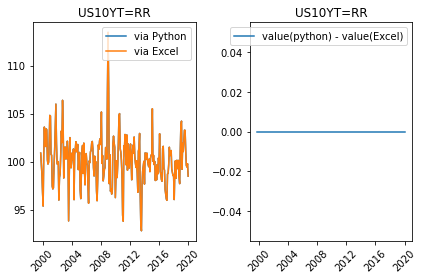

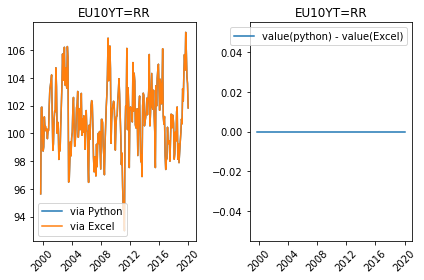

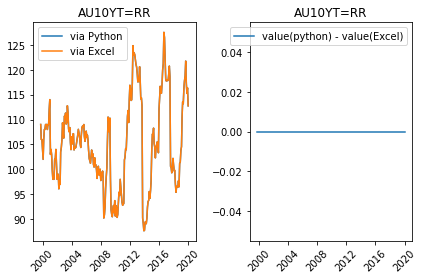

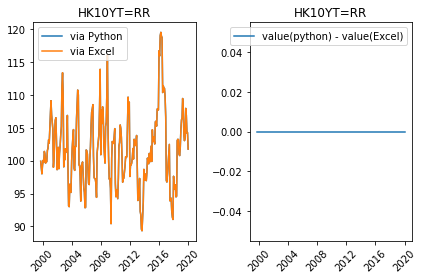

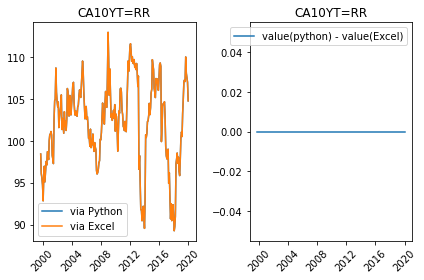

In [16]:
instruments=['US10YT=RR',
'EU10YT=RR',
'AU10YT=RR',
'HK10YT=RR',
'CA10YT=RR']
for i in instruments:
    myComparisonBondPriceM(df_o,i)

4.3 check economic date (all of monthly items)  

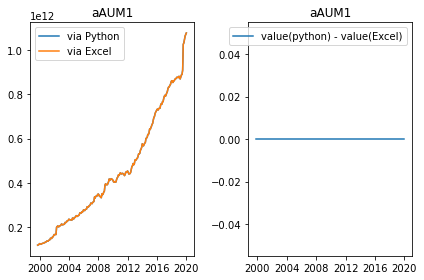

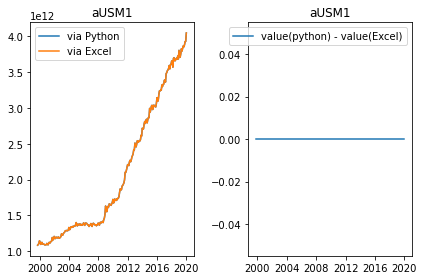

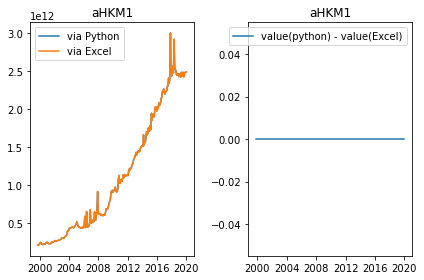

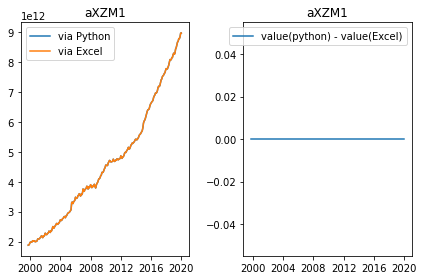

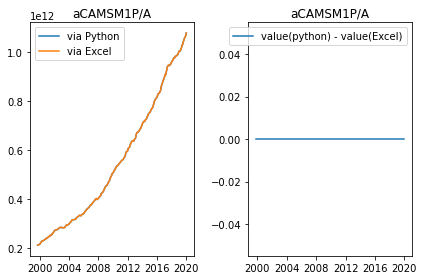

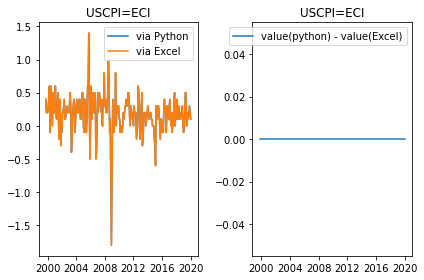

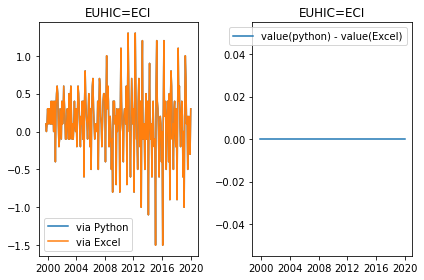

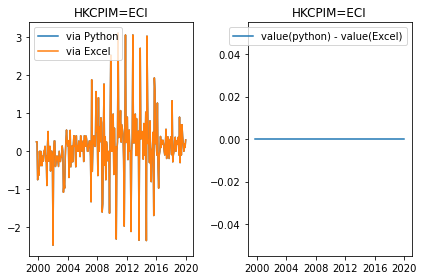

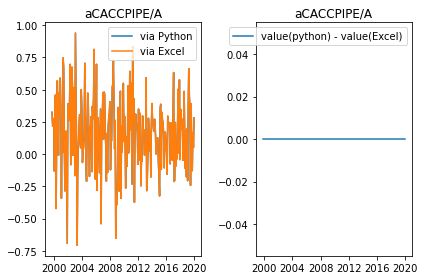

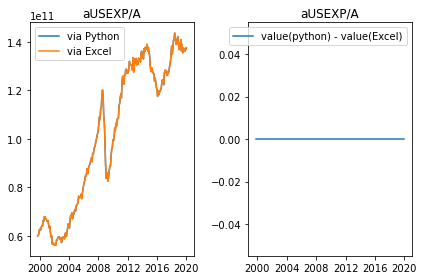

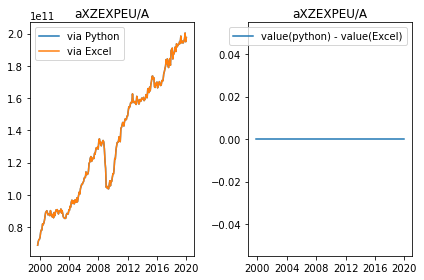

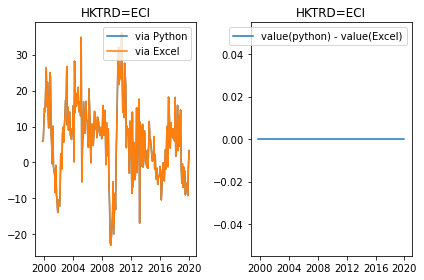

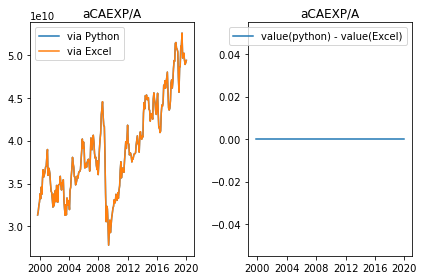

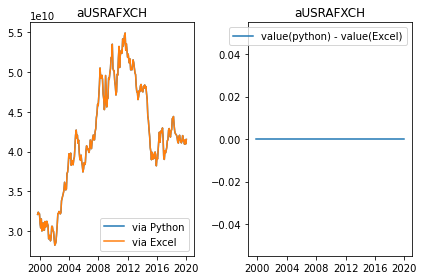

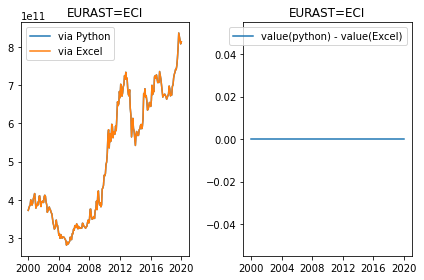

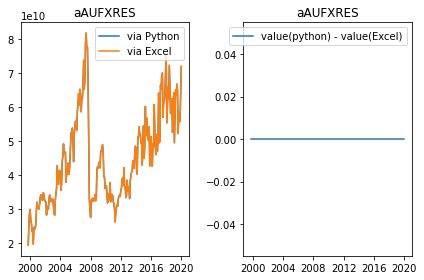

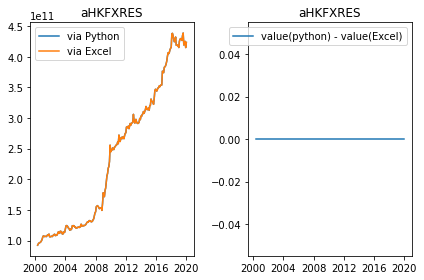

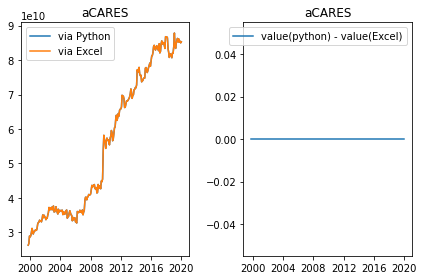

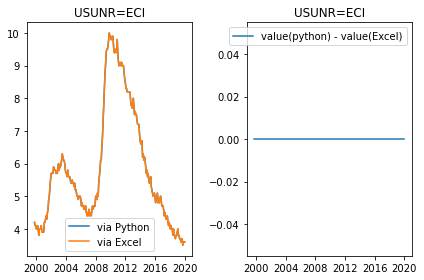

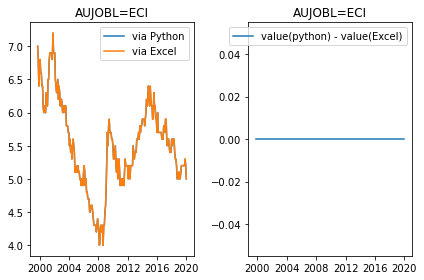

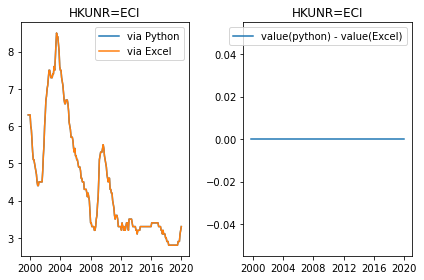

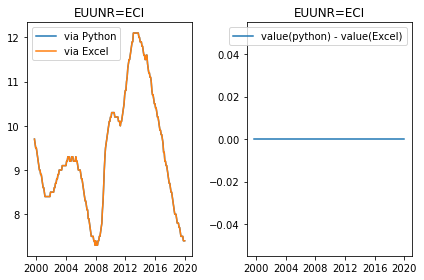

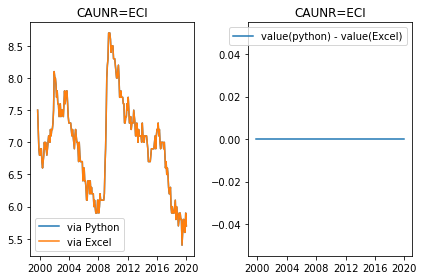

In [270]:
instruments=['aAUM1','aUSM1','aHKM1','aXZM1','aCAMSM1P/A','USCPI=ECI','EUHIC=ECI','HKCPIM=ECI','aCACCPIPE/A','aUSEXP/A','aXZEXPEU/A','HKTRD=ECI','aCAEXP/A','aUSRAFXCH','EURAST=ECI','aAUFXRES','aHKFXRES','aCARES','USUNR=ECI','AUJOBL=ECI','HKUNR=ECI','EUUNR=ECI','CAUNR=ECI']
for i in instruments:
    myComparisonEconomyData(df_o,i,'monthly')

4.4 check economic date (all of quartely items)  

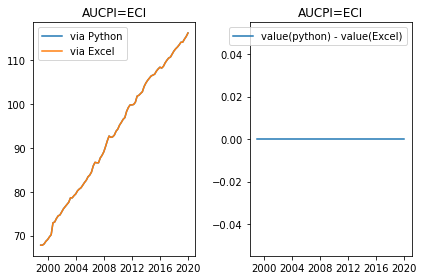

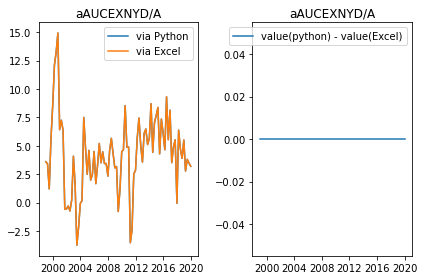

In [17]:
# read excel data
df_o = pd.read_excel(path_dir+'/refinitive.xlsx',sheet_name='original_q')
instruments=['AUCPI=ECI','aAUCEXNYD/A',]
for i in instruments:
    myComparisonEconomyData(df_o,i,'quarterly')

4.5 check economic date (all of yearly items)  

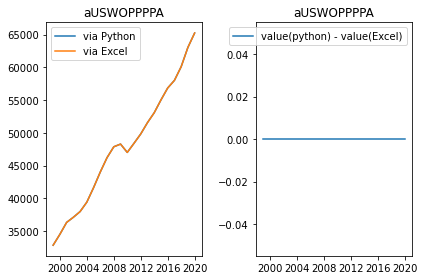

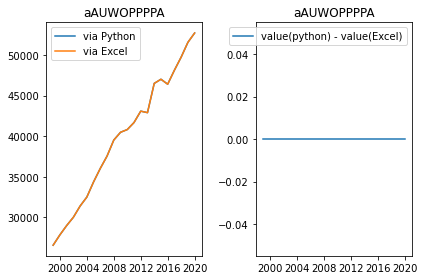

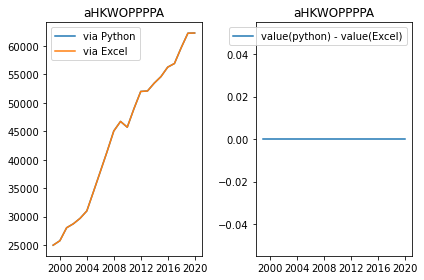

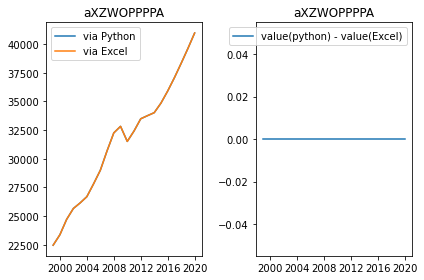

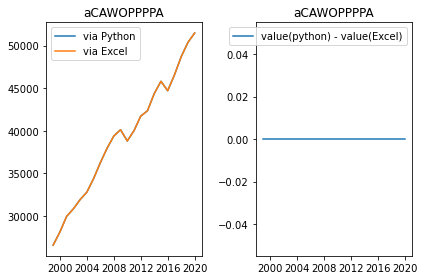

In [273]:
# read excel data
df_o = pd.read_excel(path_dir+'/refinitive.xlsx',sheet_name='original_a')
instruments=['aUSWOPPPPA','aAUWOPPPPA','aHKWOPPPPA','aXZWOPPPPA','aCAWOPPPPA']
for i in instruments:
    myComparisonEconomyData(df_o,i,'yearly')

#----------------------------------------  
#-----------5.make new datatable for analysis and store the data in SQLite database  
#----------------------------------------  

In [62]:
create_connection(path_db)
conn = sqlite3.connect(path_db)

2.6.0


In [63]:
# read data from data_refinitiv
sql='SELECT * FROM data_refinitiv'
dat=conn.execute(sql).fetchall()
col=pd.DataFrame(conn.execute("PRAGMA table_info(data_refinitiv)").fetchall()).iloc[:,1]

dat=pd.DataFrame(dat,columns=col)

# convert some columnes data into MoM change
col_list=['US10YT_RR', 'EU10YT_RR', 'AU10YT_RR', 'HK10YT_RR', 'CA10YT_RR',
       '_VIX', '_V2TX', 'aAUM1', 'aUSM1', 'aHKM1', 'aXZM1', 'aCAMSM1P_A',
       'EUR_', 'HKD_', 'GBP_', 'AUD_', 'CAD_', '_SPX', '_GDAXI', '_TOPX',
       '_HSI', '_GSPTSE', 
       'aCACCPIPE_A', 'aUSEXP_A', 'aXZEXPEU_A', 'aAUCEXNYD_A', 'HKTRD_ECI',
       'aCAEXP_A', 'aUSRAFXCH', 'EURAST_ECI', 'aAUFXRES', 'aHKFXRES', 'aCARES',
       'USUNR_ECI', 'AUJOBL_ECI', 'HKUNR_ECI', 'EUUNR_ECI', 'CAUNR_ECI']

df=dat
for i in range(len(df.columns)):
    if df.columns[i] in col_list:
       df[df.columns[i]]=df[df.columns[i]].pct_change()
       df[df.columns[i]]=[0 if np.isnan(df[df.columns[i]][j]) or np.isinf(df[df.columns[i]][j])  else df[df.columns[i]][j] for j in range(len(df[df.columns[i]]))]
       # df=df.rename(columns={df.columns[i]:df.columns[i]+'_MoM'})

# create new columns for 1m momentum of bond return
for col in ['US10YT_RR', 'EU10YT_RR', 'AU10YT_RR', 'HK10YT_RR', 'CA10YT_RR']:
    df['P1M_'+col]=df[col].shift(1)
    
tmp=pd.DataFrame(df.columns)
tmp.columns=['item']
tmp['dtype']='FLOAT (5)'
tmp['dtype'][0:2]='INT'

In [64]:
# delete table if table : data_refinitiv table  exists
conn.execute("DROP TABLE data_analysis")

In [65]:
# make table
sql='CREATE TABLE data_analysis (ID INT PRIMARY KEY NOT NULL'
for j in range(1,len(tmp.index)):
    sql+=', '+tmp['item'][j]+' '+tmp['dtype'][j]+' NOT NULL'
sql+=');'

# execution
conn.execute(sql)

In [66]:
# insert data
conn = sqlite3.connect(path_db)
# make SQL command to insert data

# get time_lag list
time_lag=pd.read_excel(path_dir+'/refinitive.xlsx',sheet_name='timelag')


for i in range(4,len(df.index)):
    sql='INSERT INTO data_analysis(ID'
    for j in range(1,len(tmp.index)):
        sql+=','+tmp['item'][j]
    sql+=') VALUES (' + str(i) 
    for j in range(1,len(tmp.index)):
        # insert data according to the months' delay to obtain the information
        sql+=','+ str(df[tmp['item'][j]][i-time_lag.iloc[j,1]])
    sql+=')'
    conn.execute(sql)
    conn.commit() 

#----------------------------------------  
#-----------6.check (DIcky Fuller test)  
#----------------------------------------  

In [67]:
from statsmodels.tsa.stattools import adfuller
create_connection(path_db)
conn = sqlite3.connect(path_db)
# read data from data_analysis
sql='SELECT * FROM data_refinitiv'
dat=conn.execute(sql).fetchall()
col=pd.DataFrame(conn.execute("PRAGMA table_info(data_refinitiv)").fetchall()).iloc[:,1]
dat=pd.DataFrame(dat,columns=col)
asset=dat.iloc[:,2:7]
for lags in range(3):
    print('Number of lags used:',lags)
    print('ADF P-Val for Prices (Level)')
    for i in asset.columns:
        adf_library = adfuller(np.diff(asset[i]), maxlag=lags, regression='nc',autolag=None)
        print(i,':',"%.2f" %  adf_library[1],)
    print('____________________________________________','\n')

2.6.0
Number of lags used: 0
ADF P-Val for Prices (Level)
US10YT_RR : 0.00
EU10YT_RR : 0.00
AU10YT_RR : 0.00
HK10YT_RR : 0.00
CA10YT_RR : 0.00
____________________________________________ 

Number of lags used: 1
ADF P-Val for Prices (Level)
US10YT_RR : 0.00
EU10YT_RR : 0.00
AU10YT_RR : 0.00
HK10YT_RR : 0.00
CA10YT_RR : 0.00
____________________________________________ 

Number of lags used: 2
ADF P-Val for Prices (Level)
US10YT_RR : 0.00
EU10YT_RR : 0.00
AU10YT_RR : 0.00
HK10YT_RR : 0.00
CA10YT_RR : 0.00
____________________________________________ 



#----------------------------------------  
#-----------7.built model and predict  
#----------------------------------------  

In [68]:
import statsmodels.api as sm
from statsmodels.stats.stattools import jarque_bera
from statsmodels.compat import lzip

def myOLS_pred(conn,coly,colx,flag_plot):
    # read data from data_analysis
    sql='SELECT * FROM data_analysis'
    dat=conn.execute(sql).fetchall()
    col=pd.DataFrame(conn.execute("PRAGMA table_info(data_analysis)").fetchall()).iloc[:,1]
    dat=pd.DataFrame(dat,columns=col)
    
    cut_point=0.8
    dat_train=dat.iloc[:int(cut_point*len(dat.index)),:]
    dat_test=dat.iloc[int(cut_point*len(dat.index)):,:]
    
    y_train=dat_train[coly]
    X_train=dat_train.loc[:,colx]
    y_test=dat_test[coly]
    X_test=dat_test.loc[:,colx]
    
    X_train=sm.add_constant(X_train,prepend=False)
    X_test=sm.add_constant(X_test,prepend=False)
    
    #est model
    model = sm.OLS(y_train,X_train)
    results = model.fit()
    results.summary()
    coef=results.params
    rr_insample=results.rsquared

            
    y_pred_insample=results.predict(X_train)
    y_pred_outsample=pd.Series(np.dot(X_test,coef))
    
    #Normality of the residuals
    sst=np.sum((y_train-np.average(y_train))**2)
    sse=np.sum((np.array(y_train)-np.array(y_pred_insample))**2)
    # rr_insample_check=1-sse/sst

    sst=sum((y_test-np.average(y_test))**2)
    sse=sum((np.array(y_test)-np.array(y_pred_outsample))**2)
    rr_outsample=1-sse/sst

    name = ['Jarque-Bera', 'JB P-value', 'Skew', 'Kurtosis']
    test = jarque_bera(y_train-y_pred_insample)
    JB=lzip(name, test)

    if flag_plot==1:        
        plt.subplot(1,2,1)
        
        plt.scatter(y_pred_insample,y_train,label='R2='+str(round(rr_insample,3)))
        plt.title(coly+'_insample')
        plt.legend()
        
    
    
        plt.subplot(1,2,2)
        plt.scatter(y_pred_outsample,y_test,label='R2='+str(round(rr_outsample,3)))
        plt.title(coly+'_outsample')
        plt.legend()
    
    
        plt.tight_layout()
        plt.show()
        
    return {'Coefficient':coef,'JB test':JB,'R^2 (insample)':rr_insample,'R^2 (outsample)':rr_outsample}

def myOLS_pred_show_summary(conn,coly,colx,flag_plot):
    res=myOLS_pred(conn,coly,colx,flag_plot)
    print('---Coefficinet from OLS---')
    print(res['Coefficient'])
    print('')
    print('---JB test : Normality test for residuals---')
    print(res['JB test'])
    print('')
    print('---R^2 (insample)---')
    print(res['R^2 (insample)'])
    print('')
    print('---R^2 (outsample)---')
    print(res['R^2 (outsample)'])
    print('')

In [69]:
# get model info
Model_List=pd.read_excel(path_dir+'/model_list.xlsx',sheet_name='List')
model_dict=dict.fromkeys(Model_List.columns,0)
for j in range(Model_List.shape[1]):
    tmp=[]
    for i in range(Model_List.shape[0]):
        if type(Model_List.iloc[i,j])==str:
            tmp.append(Model_List.iloc[i,j].replace('.','_').replace('=','_').replace('/','_'))
    model_dict[Model_List.columns[j]]=tmp

# connecting to DB
create_connection(path_db)
conn = sqlite3.connect(path_db)


2.6.0


In [70]:
def myTest(conn,model_dict,asset_num):
    model_nm=[]
    r_i=[]
    r_o=[]
    for model_num in range(1,6):
        m_l=model_dict['Model'+str(model_num)+'_'+str(asset_num)]
        print(m_l[0]+' : Model'+str(model_num))
        print('independent variable :')
        print(m_l[1:])
        res=myOLS_pred(conn,m_l[0],m_l[1:],0)
        model_nm.append('Model'+str(model_num)+'_'+str(asset_num))
        r_i.append(res['R^2 (insample)'])
        r_o.append(res['R^2 (outsample)'])
    X_axis = np.arange(len(model_nm))
    plt.bar(X_axis - 0.2,r_i,0.4,label='insample (200001-201512)')
    plt.bar(X_axis + 0.2,r_o,0.4,label='out of sample (201601-201912)')
    plt.xticks(X_axis, model_nm)
    plt.ylabel('R^2')
    plt.legend()
    plt.show()    
    
    best_model_num= np.where(r_o == np.amax(r_o))[0] +1 
    return best_model_num

def myTest_summary(conn,model_dict,asset_num,flag_plot):
    print('----------------------------------')
    print('------Comparison among 5 models----------')
    print('----------------------------------')
    best_model_num=myTest(conn,model_dict,asset_num)

    # output the detail of the best model regression
    model_num='Model'+str(best_model_num[0]) +'_'+str(asset_num)
    print('-----------------------------------------------')
    print('------Detail of best model : '+model_num+'----------')
    print('-----------------------------------------------')
    myOLS_pred_show_summary(conn,model_dict[model_num][0],model_dict[model_num][1:],flag_plot)


----------------------------------
------Comparison among 5 models----------
----------------------------------
US10YT_RR : Model1
independent variable :
['USCPI_ECI', '_VIX', 'aUSWOPPPPA', 'USUNR_ECI', 'aUSM1']
US10YT_RR : Model2
independent variable :
['P1M_US10YT_RR']
US10YT_RR : Model3
independent variable :
['P1M_US10YT_RR', '_SPX']
US10YT_RR : Model4
independent variable :
['USCPI_ECI', '_VIX', 'aUSWOPPPPA', 'USUNR_ECI', 'aUSM1', 'P1M_US10YT_RR', '_SPX']
US10YT_RR : Model5
independent variable :
['USCPI_ECI', '_VIX', 'aUSWOPPPPA', 'USUNR_ECI', 'aUSM1', 'P1M_US10YT_RR', '_SPX', 'aUSEXP_A', 'aUSRAFXCH', 'EUR_']


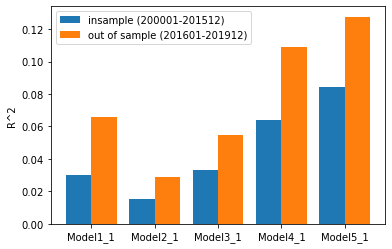

-----------------------------------------------
------Detail of best model : Model5_1----------
-----------------------------------------------


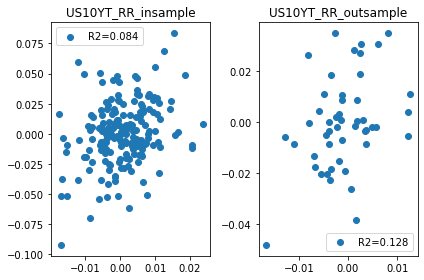

---Coefficinet from OLS---
USCPI_ECI        0.013316
_VIX             0.000306
aUSWOPPPPA      -0.280538
USUNR_ECI        0.037359
aUSM1            0.131614
P1M_US10YT_RR   -0.206557
_SPX            -0.112516
aUSEXP_A         0.134551
aUSRAFXCH       -0.101475
EUR_             0.068799
const           -0.001941
dtype: float64

---JB test : Normality test for residuals---
[('Jarque-Bera', 3.0832838504380717), ('JB P-value', 0.21402939250894634), ('Skew', 0.003903477990258864), ('Kurtosis', 3.6207652799110766)]

---R^2 (insample)---
0.0844634528254179

---R^2 (outsample)---
0.12755492140107616



In [71]:
# US bond return 
asset_num=1
myTest_summary(conn,model_dict,asset_num,1)

----------------------------------
------Comparison among 5 models----------
----------------------------------
EU10YT_RR : Model1
independent variable :
['EUHIC_ECI', '_V2TX', 'aXZWOPPPPA', 'EUUNR_ECI', 'aXZM1']
EU10YT_RR : Model2
independent variable :
['P1M_EU10YT_RR']
EU10YT_RR : Model3
independent variable :
['P1M_EU10YT_RR', '_GDAXI']
EU10YT_RR : Model4
independent variable :
['EUHIC_ECI', '_V2TX', 'aXZWOPPPPA', 'EUUNR_ECI', 'aXZM1', 'P1M_EU10YT_RR', '_GDAXI']
EU10YT_RR : Model5
independent variable :
['EUHIC_ECI', '_V2TX', 'aXZWOPPPPA', 'EUUNR_ECI', 'aXZM1', 'P1M_EU10YT_RR', '_GDAXI', 'aXZEXPEU_A', 'EURAST_ECI', 'EUR_']


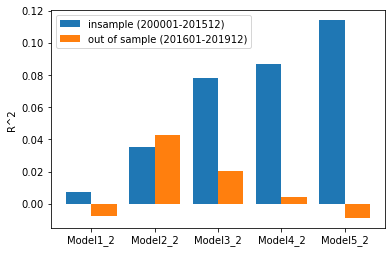

-----------------------------------------------
------Detail of best model : Model2_2----------
-----------------------------------------------


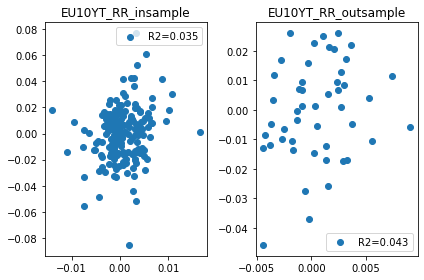

---Coefficinet from OLS---
P1M_EU10YT_RR   -0.187831
const            0.000441
dtype: float64

---JB test : Normality test for residuals---
[('Jarque-Bera', 45.80402605929856), ('JB P-value', 1.1318323864279043e-10), ('Skew', -0.25382113855830435), ('Kurtosis', 5.338333290165494)]

---R^2 (insample)---
0.03532199944856518

---R^2 (outsample)---
0.043033078077055587



In [72]:
# EU bond return 
asset_num=2
myTest_summary(conn,model_dict,asset_num,1)

----------------------------------
------Comparison among 5 models----------
----------------------------------
CA10YT_RR : Model1
independent variable :
['aCACCPIPE_A', '_VIX', 'aCAWOPPPPA', 'CAUNR_ECI', 'aCAMSM1P_A']
CA10YT_RR : Model2
independent variable :
['P1M_CA10YT_RR']
CA10YT_RR : Model3
independent variable :
['P1M_CA10YT_RR', '_GSPTSE']
CA10YT_RR : Model4
independent variable :
['aCACCPIPE_A', '_VIX', 'aCAWOPPPPA', 'CAUNR_ECI', 'aCAMSM1P_A', 'P1M_CA10YT_RR', '_GSPTSE']
CA10YT_RR : Model5
independent variable :
['aCACCPIPE_A', '_VIX', 'aCAWOPPPPA', 'CAUNR_ECI', 'aCAMSM1P_A', 'P1M_CA10YT_RR', '_GSPTSE', 'aCAEXP_A', 'aCARES', 'CAD_']


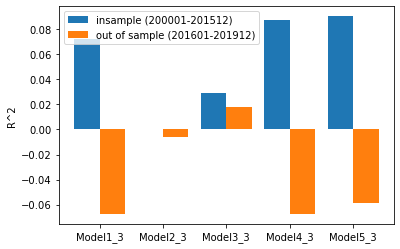

-----------------------------------------------
------Detail of best model : Model3_3----------
-----------------------------------------------


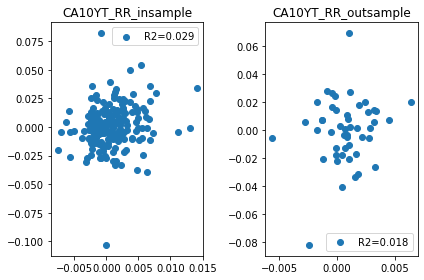

---Coefficinet from OLS---
P1M_CA10YT_RR   -0.040074
_GSPTSE         -0.076046
const            0.001171
dtype: float64

---JB test : Normality test for residuals---
[('Jarque-Bera', 266.52579920757984), ('JB P-value', 1.3324719016113992e-58), ('Skew', -0.3539786052163591), ('Kurtosis', 8.72839606601567)]

---R^2 (insample)---
0.02877759973195626

---R^2 (outsample)---
0.017558097423688412



In [73]:
# Canada bond return 
asset_num=3
myTest_summary(conn,model_dict,asset_num,1)

----------------------------------
------Comparison among 5 models----------
----------------------------------
AU10YT_RR : Model1
independent variable :
['AUCPI_ECI', '_VIX', 'aAUWOPPPPA', 'AUJOBL_ECI', 'aAUM1']
AU10YT_RR : Model2
independent variable :
['P1M_AU10YT_RR']
AU10YT_RR : Model3
independent variable :
['P1M_AU10YT_RR', '_TOPX']
AU10YT_RR : Model4
independent variable :
['AUCPI_ECI', '_VIX', 'aAUWOPPPPA', 'AUJOBL_ECI', 'aAUM1', 'P1M_AU10YT_RR', '_TOPX']
AU10YT_RR : Model5
independent variable :
['AUCPI_ECI', '_VIX', 'aAUWOPPPPA', 'AUJOBL_ECI', 'aAUM1', 'P1M_AU10YT_RR', '_TOPX', 'aAUCEXNYD_A', 'aAUFXRES', 'AUD_']


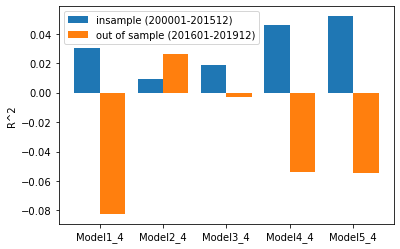

-----------------------------------------------
------Detail of best model : Model2_4----------
-----------------------------------------------


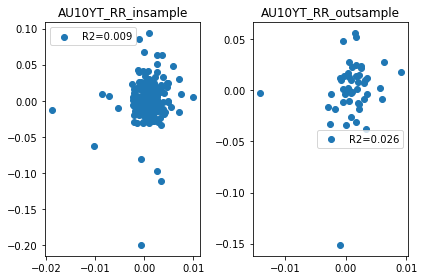

---Coefficinet from OLS---
P1M_AU10YT_RR    0.098200
const            0.000796
dtype: float64

---JB test : Normality test for residuals---
[('Jarque-Bera', 1548.7960988403029), ('JB P-value', 0.0), ('Skew', -1.8601222479646544), ('Kurtosis', 16.40743425288916)]

---R^2 (insample)---
0.009228967586694448

---R^2 (outsample)---
0.026033167263447732



In [74]:
# Austrarila bond return 
asset_num=4
myTest_summary(conn,model_dict,asset_num,1)

----------------------------------
------Comparison among 5 models----------
----------------------------------
HK10YT_RR : Model1
independent variable :
['HKCPIM_ECI', '_VIX', 'aHKWOPPPPA', 'HKUNR_ECI', 'aHKM1']
HK10YT_RR : Model2
independent variable :
['P1M_HK10YT_RR']
HK10YT_RR : Model3
independent variable :
['P1M_HK10YT_RR', '_HSI']
HK10YT_RR : Model4
independent variable :
['HKCPIM_ECI', '_VIX', 'aHKWOPPPPA', 'HKUNR_ECI', 'aHKM1', 'P1M_HK10YT_RR', '_HSI']
HK10YT_RR : Model5
independent variable :
['HKCPIM_ECI', '_VIX', 'aHKWOPPPPA', 'HKUNR_ECI', 'aHKM1', 'P1M_HK10YT_RR', '_HSI', 'HKTRD_ECI', 'aHKFXRES', 'HKD_']


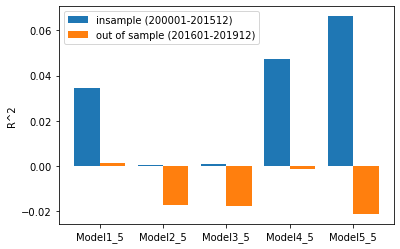

-----------------------------------------------
------Detail of best model : Model1_5----------
-----------------------------------------------


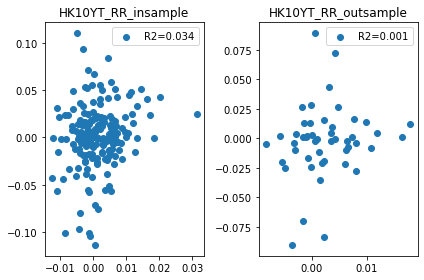

---Coefficinet from OLS---
HKCPIM_ECI    0.000946
_VIX          0.021339
aHKWOPPPPA   -0.525812
HKUNR_ECI    -0.080628
aHKM1        -0.032415
const         0.003343
dtype: float64

---JB test : Normality test for residuals---
[('Jarque-Bera', 42.26129716633067), ('JB P-value', 6.653894662549779e-10), ('Skew', -0.35874208790722834), ('Kurtosis', 5.183547252350446)]

---R^2 (insample)---
0.03442958684609343

---R^2 (outsample)---
0.001428614674796047



In [75]:
# Hong Kong bond return 
asset_num=5
myTest_summary(conn,model_dict,asset_num,1)

#----------------------------------------  
#-----------8.observe the beta development with moving window method  
#----------------------------------------  

In [76]:
def myOLS_MW(conn,coly,colx,days):
    # read data from data_analysis
    sql='SELECT * FROM data_analysis'
    dat=conn.execute(sql).fetchall()
    col=pd.DataFrame(conn.execute("PRAGMA table_info(data_analysis)").fetchall()).iloc[:,1]
    dat=pd.DataFrame(dat,columns=col)
    
    #est model
    ret=[]
    for j in range(len(dat.index)-days):
        t=days+j
        dat_tmp=dat.iloc[(t-days):t,:]
        y_train=dat_tmp[coly]
        X_train=dat_tmp.loc[:,colx]
        model = sm.OLS(y_train,X_train)
        results = model.fit()
        # results.summary()    
        ret.append(results.params)
    ret=pd.DataFrame(ret)
    
    for col in ret.columns:    
        plt.plot(ret[col],label=[col])
    plt.title(coly+' : Beta(MW,'+str(days)+'days)')
    
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

    ret['YYYYMM']=np.array(dat['YYYYMM'][days:])
    
    return ret

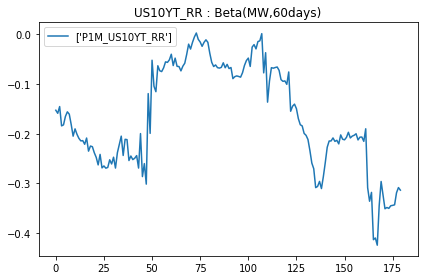

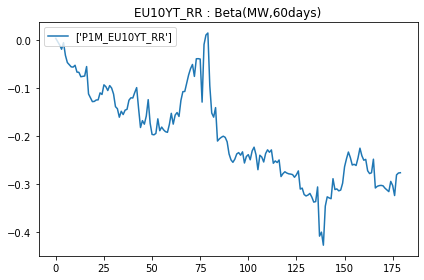

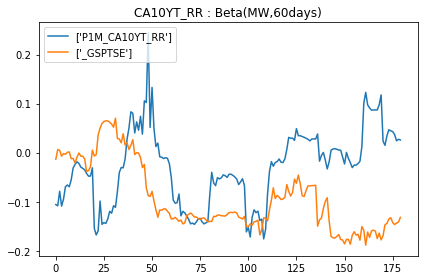

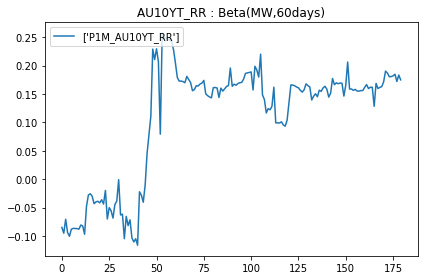

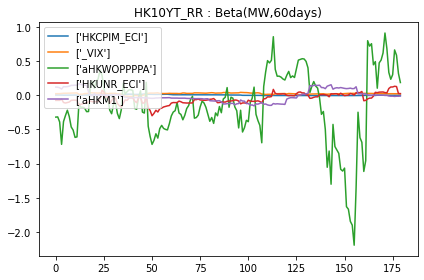

In [77]:
# calc coeficient with moving windows for best model for each asset
window_len=60
res_US=myOLS_MW(conn,model_dict['Model2_1'][0],model_dict['Model2_1'][1:],window_len)
res_EU=myOLS_MW(conn,model_dict['Model2_2'][0],model_dict['Model2_2'][1:],window_len)
res_CA=myOLS_MW(conn,model_dict['Model3_3'][0],model_dict['Model3_3'][1:],window_len)
res_AU=myOLS_MW(conn,model_dict['Model2_4'][0],model_dict['Model2_4'][1:],window_len)
res_HK=myOLS_MW(conn,model_dict['Model1_5'][0],model_dict['Model1_5'][1:],window_len)